# Normality Check

An important decision point when working with a sample of data is whether to use parametric or nonparametric statistical methods.

Parametric statistical methods assume that the data has a known and specific distribution, often a Gaussian distribution. If a data sample is not Gaussian, then the assumptions of parametric statistical tests are violated and nonparametric statistical methods must be used.

There are a range of techniques that you can use to check if your data sample deviates from a Gaussian distribution, called normality tests.



## Load Data and Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from scipy.stats.stats import pearsonr
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.special import inv_boxcox
from math import sqrt
from sklearn.metrics import r2_score
import seaborn as sns


In [2]:
train = pd.read_csv("data/train.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# to make this notebook's output stable across runs
random_state=42
np.random.seed(random_state)

### Sample out only numeric columns for simplicity

In [5]:
train = train[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'SalePrice']]

In [6]:
train

,MSSubClass,LotArea,OverallQual,OverallCond,YearRemodAdd,SalePrice
0,60,8450,7,5,2003,208500
1,20,9600,6,8,1976,181500
2,60,11250,7,5,2002,223500
3,70,9550,7,5,1970,140000
4,60,14260,8,5,2000,250000
5,50,14115,5,5,1995,143000
6,20,10084,8,5,2005,307000
7,60,10382,7,6,1973,200000
8,50,6120,7,5,1950,129900
9,190,7420,5,6,1950,118000


In [7]:
#Remove nan with Zero(0)
train.fillna(0, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
MSSubClass      1460 non-null int64
LotArea         1460 non-null int64
OverallQual     1460 non-null int64
OverallCond     1460 non-null int64
YearRemodAdd    1460 non-null int64
SalePrice       1460 non-null int64
dtypes: int64(6)
memory usage: 68.5 KB


In [8]:
train.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearRemodAdd,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1984.865753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,20.645407,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1950.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1967.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1994.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2004.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,755000.000000


## Split Train & Test data

In [9]:
train_set, test_set = train_test_split(train, test_size=0.2, random_state=random_state)

## Check for normality of test/target variable

In statistics, __normality__ tests are used to determine if a data set is well-modeled by a normal distribution and to compute how likely it is for a random variable underlying the data set to be normally distributed.

__Skewness__ is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. Skewness in a data series may sometimes be observed not only graphically but by simple inspection of the values. For instance, consider the numeric sequence (49, 50, 51), whose values are evenly distributed around a central value of 50. We can transform this sequence into a negatively skewed distribution by adding a value far below the mean, e.g. (40, 49, 50, 51). Similarly, we can make the sequence positively skewed by adding a value far above the mean, e.g. (49, 50, 51, 60). __Lesser the skewness, more normally distributed the dataset is.__

__Kurtosis__ is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case.


 mu = 181441.54 and sigma = 77230.50



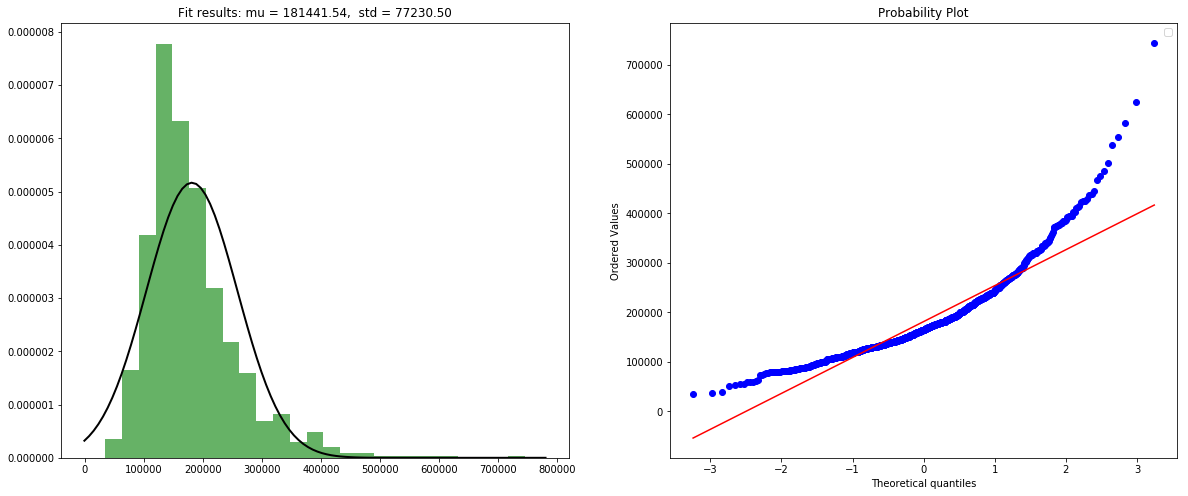

Skewness: 1.743129
Kurtosis: 5.475315


In [10]:
data = train_set['SalePrice']
# Fit a normal distribution to the data:
mu, std = norm.fit(data)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,8)

''' 
An informal approach to testing normality 
is to compare a histogram of the sample data to a normal probability curve.
'''
ax1.hist(data, bins=25, density=True, alpha=0.6, color='g')
# Plot the PDF.
xmin, xmax = ax1.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax1.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
ax1.set_title(title)


'''
A better way to visualize test for normality is Normal probability plot
In a normal probability plot (also called a "normal plot"), the sorted data are plotted 
vs. values selected to make the resulting image look close to a straight line if the data 
are approximately normally distributed. Deviations from a straight line suggest departures from normality. 
'''
(mu, sigma) = norm.fit(train_set['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
ax2.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
ax2.set_ylabel('Frequency')
ax2.set_title('SalePrice distribution')
stats.probplot(train_set['SalePrice'], plot=ax2)

plt.show()


print("Skewness: %f" % train_set['SalePrice'].skew())
print("Kurtosis: %f" % train_set['SalePrice'].kurt())

__Observations :__
-  Looks like a normal distribution? Not quite! Looking at the kurtosis score, we can see that there is a very nice peak. However, looking at the skewness score, we can see that the sale prices deviate from the normal distribution.
-  Both the value of Skewness & Kurtosis are high, it doesn't represent a normal distribution. For normal distribution, the Skewness is below 1 & Kurtosis below 3.

__The above test are visual test for normality, Below are few more test that can be done to test for normal distribution:- __

1. D'Agostino's K-squared test,
2. Jarque–Bera test,
3. Anderson–Darling test,
4. Cramér–von Mises criterion,
5. Lilliefors test,
6. Kolmogorov–Smirnov test,
7. __Shapiro–Wilk test :__  The Shapiro-Wilk test, proposed in 1965, calculates a W statistic that tests whether a random sample, x1,x2,…,xn comes from (specifically) a normal distribution . Small values of W are evidence of departure from normality

8. Pearson's chi-squared test
9. __Anderson–Darling__ : The Anderson–Darling test is a statistical test of whether a given sample of data is drawn from a given probability distribution. When applied to testing whether a normal distribution adequately describes a set of data, it is one of the most powerful statistical tools for detecting most departures from normality. _If the returned statistic is larger than these critical values then for the corresponding significance level, the null hypothesis that the data come from the chosen distribution can be rejected. The returned statistic is referred to as ‘A2’ in the references._

In [11]:
#Shapiro–Wilk test
stats.shapiro(train_set['SalePrice'])

(0.8810798525810242, 5.497511655767464e-29)

In [12]:
#Anderson–Darling test
stats.anderson(train_set['SalePrice'], dist='norm')

AndersonResult(statistic=31.358053701054814, critical_values=array([0.574, 0.654, 0.784, 0.915, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

__Observation :__

-  When you perform a hypothesis test in statistics, a p-value helps you determine the significance of your results. Hypothesis tests are used to test the validity of a claim that is made about a population. This claim that’s on trial, in essence, is called the null hypothesis. The alternative hypothesis is the one you would believe if the null hypothesis is concluded to be untrue.
    -  A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.
    -  A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.
-  Based on the p value from Shapiro–Wilk test (3.206247534576162e-33), the null hypothesis is rejected as 3.206247534576162e-33 not greater than 0.5. This data doesn't belong from a normal distribution.
-  Based on the test statistics of Anderson–Darling test, we can see that the statistic is way more than the critical_values for any significance_level, so the hypotheis is rejected. The data set is not from normal distribution.

__The data is not derived from a normal distribution based on the target variable, we will check if the error follows a normal distribution or not ?__

## Validate if the Error follows a normal distribution

### Fit a model

In [13]:
housing_X_train = train_set.iloc[:,:-1]
housing_y_train = train_set.iloc[:,-1:]

housing_X_test = test_set.iloc[:,:-1]
housing_y_test = test_set.iloc[:,-1:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(housing_X_train, housing_y_train)

# Make predictions using the testing set
housing_y_pred = regr.predict(housing_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The root mean squared error
print("Root Mean squared error: %.2f"% sqrt(mean_squared_error(housing_y_test, housing_y_pred)))

df_error = housing_y_test.copy()
df_error["pred_SalePrice"] = housing_y_pred
df_error["error"] = df_error["SalePrice"] - df_error["pred_SalePrice"]
df_error

Coefficients: 
 [[-1.70419818e+02  1.30792709e+00  3.91940768e+04 -1.82744912e+03
   5.10061743e+02]]
Root Mean squared error: 49483.39


,SalePrice,pred_SalePrice,error
892,154500,184799.775485,-30299.775485
1105,325000,262798.045745,62201.954255
413,115000,121237.254526,-6237.254526
522,159000,150016.094616,8983.905384
1036,315500,316279.407149,-779.407149
614,75500,57932.655917,17567.344083
218,311500,228061.233586,83438.766414
1160,146000,145648.980006,351.019994
649,84500,57494.559986,27005.440014
887,135500,128369.018494,7130.981506


__The error also doesn't follow a normal distribution__
-  The Screwness is more than 1
-  Kurtosis is more than 3, i.e has a very long tail.


 mu = 2925.92 and sigma = 49396.81



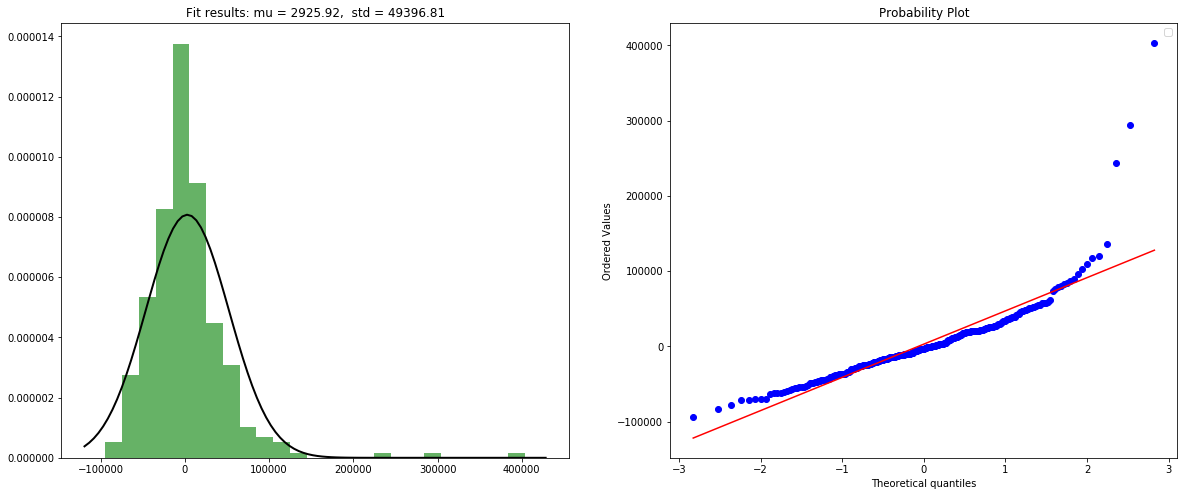

Skewness: 3.076953
Kurtosis: 19.472713


In [14]:
data = df_error['error']
# Fit a normal distribution to the data:
mu, std = norm.fit(data)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,8)

''' 
An informal approach to testing normality 
is to compare a histogram of the sample data to a normal probability curve.
'''
ax1.hist(data, bins=25, density=True, alpha=0.6, color='g')
# Plot the PDF.
xmin, xmax = ax1.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax1.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
ax1.set_title(title)



'''
A better way to visualize test for normality is Normal probability plot
In a normal probability plot (also called a "normal plot"), the sorted data are plotted 
vs. values selected to make the resulting image look close to a straight line if the data 
are approximately normally distributed. Deviations from a straight line suggest departures from normality. 
'''
(mu, sigma) = norm.fit(df_error['error'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
ax2.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
ax2.set_ylabel('Frequency')
ax2.set_title('SalePrice distribution')
stats.probplot(df_error['error'], plot=ax2)

plt.show()


print("Skewness: %f" % df_error['error'].skew())
print("Kurtosis: %f" % df_error['error'].kurt())

## Next step after deciding normality of data?

As the error distribution is also not normal, we can state that the dataset in not from a normal distribution.
So we need to convert the dataset into normal distribution.

We start with converting the target variable into normal form

### Convert the dataset (only target variable) into normal distribution

In [15]:
salePrice_transformed,lambda_boxcox = stats.boxcox(train_set['SalePrice'])

train_set_transformed = train_set.copy()
train_set_transformed["salePrice_transformed"] = salePrice_transformed
train_set_transformed

,MSSubClass,LotArea,OverallQual,OverallCond,YearRemodAdd,SalePrice,salePrice_transformed
254,20,8400,5,6,1957,145000,7.531007
1066,60,7837,6,7,1994,178000,7.606241
638,30,8777,5,7,1950,85000,7.328885
799,50,7200,5,7,1950,175000,7.600053
380,50,5000,5,6,1950,127000,7.481685
303,20,9800,5,7,1972,149900,7.543289
86,60,11911,6,5,2005,174000,7.597965
1385,50,5436,4,8,2007,125500,7.477237
265,20,12090,6,6,1981,175500,7.601093
793,20,9158,8,5,2007,225000,7.690647


Now check if the dataset is converted to normal distribution.


 mu = 7.58 and sigma = 0.14



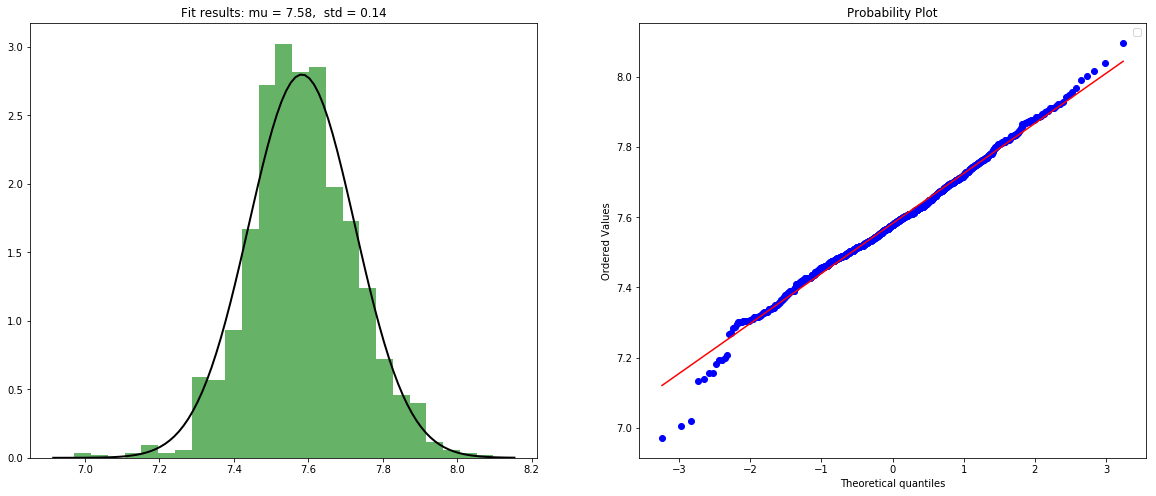

Skewness: -0.008051
Kurtosis: 0.776059


In [16]:
data = train_set_transformed['salePrice_transformed']
# Fit a normal distribution to the data:
mu, std = norm.fit(data)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,8)

''' 
An informal approach to testing normality 
is to compare a histogram of the sample data to a normal probability curve.
'''
ax1.hist(data, bins=25, density=True, alpha=0.6, color='g')
# Plot the PDF.
xmin, xmax = ax1.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax1.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
ax1.set_title(title)


'''
A better way to visualize test for normality is Normal probability plot
In a normal probability plot (also called a "normal plot"), the sorted data are plotted 
vs. values selected to make the resulting image look close to a straight line if the data 
are approximately normally distributed. Deviations from a straight line suggest departures from normality. 
'''
(mu, sigma) = norm.fit(train_set_transformed['salePrice_transformed'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
ax2.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
ax2.set_ylabel('Frequency')
ax2.set_title('SalePrice distribution')
stats.probplot(train_set_transformed['salePrice_transformed'], plot=ax2)

plt.show()


print("Skewness: %f" % train_set_transformed['salePrice_transformed'].skew())
print("Kurtosis: %f" % train_set_transformed['salePrice_transformed'].kurt())

The Skewness & Kurtosis are significantly low now and well within normal distribution range.

## Fit the model

In [17]:
housing_X_train = train_set_transformed.iloc[:,:-2]
housing_y_train = train_set_transformed.iloc[:,-1:]

housing_X_test = test_set.iloc[:,:-1]
housing_y_test = test_set.iloc[:,-1:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(housing_X_train, housing_y_train)

# Make predictions using the testing set
housing_y_pred = regr.predict(housing_X_test)

#Convert to actual value
housing_y_pred_actual = inv_boxcox(housing_y_pred, lambda_boxcox)


# The coefficients
print('Coefficients: \n', regr.coef_)
# The root mean squared error
print("Root Mean squared error: %.2f"% sqrt(mean_squared_error(housing_y_test, housing_y_pred_actual)))


Coefficients: 
 [[-2.83492314e-04  2.28220804e-06  7.18301913e-02  1.94048923e-03
   1.32105274e-03]]
Root Mean squared error: 45599.10


Compared to the smaple mean, the RMSE is close to 25%, i.e error of 25%. Though not excelinet, but accepable based on usecases.

The RMSE have reduced after converting the target variable to normal form, hence shows improvement.

### Evaluate the Result

__R-squared__ measures the proportion of the variation in your dependent variable (Y) explained by your independent variables (X) for a linear regression model. __Adjusted R-squared__ adjusts the statistic based on the number of independent variables in the model.

The reason this is important is because you can "game" R-squared by adding more and more independent variables, irrespective of how well they are correlated to your dependent variable. Obviously, this isn't a desirable property of a goodness-of-fit statistic. Conversely, adjusted R-squared provides an adjustment to the R-squared statistic such that an independent variable that has a correlation to Y increases adjusted R-squared and any variable without a strong correlation will make adjusted  R-squared decrease. That is the desired property of a goodness-of-fit statistic.

About which one to use...in the case of a linear regression with more than one variable: adjusted R-squared. For a single independent variable model, both statistics are interchangeable.

#### R2 score

In [18]:
r2_sco = r2_score(housing_y_test, housing_y_pred_actual)
r2_sco

0.7289192633384183

Higher the score better the accuracy.

__The R2 score looks failrly acceptable. Lets compute adjusted R2 to confirm acceptance.__

#### Adjusted R2

In [19]:
num_observations = housing_y_test.shape[0]
num_independent_var = housing_X_train.shape[1]
adj_r2_sco = 1 - ((1- r2_sco)*((num_observations - 1 )/(num_observations - num_independent_var - 1)))
adj_r2_sco

0.7241800896205585

Higher the score better the accuracy.

__The adjusted R2 also looks acceptable, lets plot the residual plot to visualize error.__

#### Resudial plot

A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

Positive values for the residual (on the y-axis) mean the prediction was too low, and negative values mean the prediction was too high; 0 means the guess was exactly correct.

If you can detect a clear pattern or trend in your residuals, then your model has room for improvement.

#### Residuals vs. Fits Plot

When conducting a residual analysis, a "residuals versus fits plot" is the most frequently created plot. It is a scatter plot of residuals on the y axis and fitted values (estimated responses) on the x axis. The plot is used to detect non-linearity, unequal error variances, and outliers.

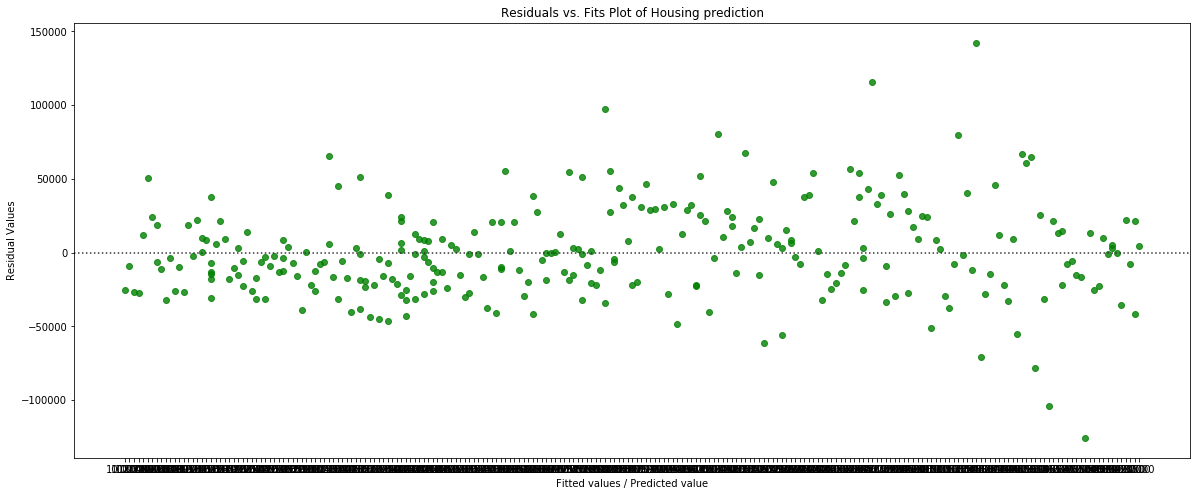

In [20]:
fig,ax1 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(20,8)

# Plot the residuals after fitting a linear model
sns.residplot(housing_y_test, housing_y_pred_actual, color="g")
ax1.set_xlabel('Fitted values / Predicted value')
ax1.set_ylabel('Residual Values')
ax1.set_title('Residuals vs. Fits Plot of Housing prediction')
plt.show()

_The Residuals vs. Fits Plot looks to have no pattern & is also centered towards the Zero line, they indicate that the model’s predictions are correct on average rather than systematically too high or low_

## Enhance Model

Convert all features to normal distribution, hoping the RMSE will come down & the model will perform better.

Probablity plot for all features and the target variable also

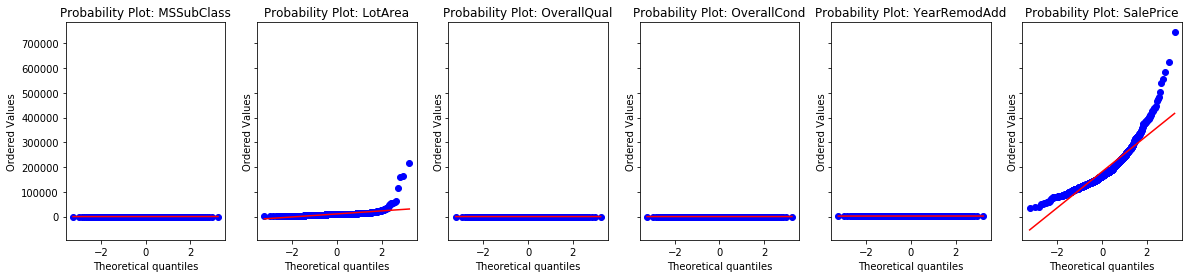

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=6, sharex=False, sharey=True, figsize=(20,4))
for i, item in enumerate(train_set.keys()):
    prob = stats.probplot(train_set[item], dist=stats.norm, plot=ax[i])
    _= ax[i].set_title('Probability Plot: {0}'.format(item))

As visible, the LotArea feature and target SalePrice is not from normal distribution. 

### Convert non-normal columns to normal distribution.

In [28]:
#Transform the LotArea feature
lotArea_transformed,lambda_boxcox_LotArea = stats.boxcox(train_set['LotArea'])

#Transform the target variable
salePrice_transformed,lambda_boxcox_SalePrice = stats.boxcox(train_set['SalePrice'])

train_set_transformed = train_set.copy()
train_set_transformed["lotArea_transformed"] = lotArea_transformed
train_set_transformed["salePrice_transformed"] = salePrice_transformed

#Drop columns that are transformed
train_set_transformed.drop(columns=['LotArea','SalePrice'], inplace=True)
train_set_transformed

,MSSubClass,OverallQual,OverallCond,YearRemodAdd,lotArea_transformed,salePrice_transformed
254,20,5,6,1957,9.152189,7.531007
1066,60,6,7,1994,9.081028,7.606241
638,30,5,7,1950,9.197229,7.328885
799,50,5,7,1950,8.994091,7.600053
380,50,5,6,1950,8.620384,7.481685
303,20,5,7,1972,9.310356,7.543289
86,60,6,5,2005,9.510617,7.597965
1385,50,4,8,2007,8.706034,7.477237
265,20,6,6,1981,9.525934,7.601093
793,20,8,5,2007,9.240827,7.690647


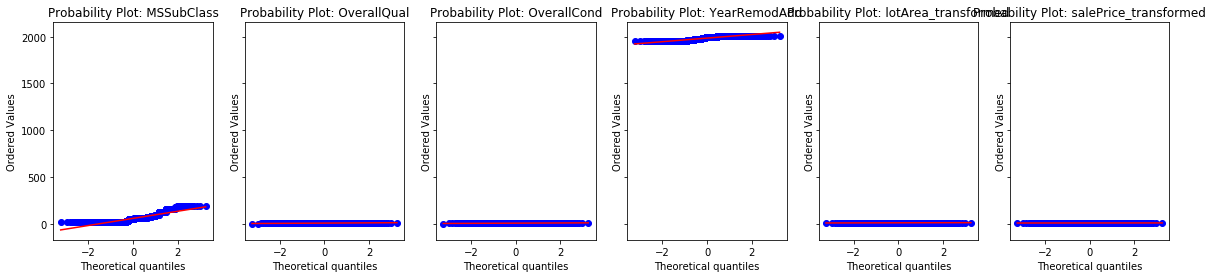

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=6, sharex=False, sharey=True, figsize=(20,4))
for i, item in enumerate(train_set_transformed.keys()):
    prob = stats.probplot(train_set_transformed[item], dist=stats.norm, plot=ax[i])
    _= ax[i].set_title('Probability Plot: {0}'.format(item))

Now all the features and target variable follow a normal distribution

### Fit the model

In [35]:
#Preprocess test variable

#Convert LotArea attribute in test dataset to normal distribution
lotArea_transformed = stats.boxcox(test_set['LotArea'], lmbda=lambda_boxcox_LotArea)

test_set_transformed = test_set.copy()
test_set_transformed["lotArea_transformed"] = lotArea_transformed

#Drop columns that are transformed
test_set_transformed.drop(columns=['LotArea'], inplace=True)
test_set_transformed

,MSSubClass,OverallQual,OverallCond,YearRemodAdd,SalePrice,lotArea_transformed
892,20,6,8,2003,154500,9.153897
1105,60,8,5,1995,325000,9.539938
413,30,5,6,1950,115000,9.218401
522,50,6,7,1950,159000,8.620384
1036,20,9,5,2008,315500,9.592373
614,180,4,6,1972,75500,7.383070
218,50,7,9,2006,311500,9.791718
1160,160,6,5,1978,146000,7.816908
649,180,4,6,1970,84500,7.649787
887,50,5,7,1955,135500,9.843296


In [36]:
housing_X_train = train_set_transformed.iloc[:,:-1]
housing_y_train = train_set_transformed.iloc[:,-1:]

housing_X_test = test_set_transformed.iloc[:,[0,1,2,3,5]]
housing_y_test = test_set_transformed.iloc[:,-2:-1]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(housing_X_train, housing_y_train)

# Make predictions using the testing set
housing_y_pred = regr.predict(housing_X_test)

#Convert to actual value
housing_y_pred_actual = inv_boxcox(housing_y_pred, lambda_boxcox_SalePrice)


# The coefficients
print('Coefficients: \n', regr.coef_)
# The root mean squared error
print("Root Mean squared error: %.2f"% sqrt(mean_squared_error(housing_y_test, housing_y_pred_actual)))


Coefficients: 
 [[8.00693018e-05 6.68959921e-02 1.56123088e-03 1.42203605e-03
  8.03275831e-02]]
Root Mean squared error: 42789.96


__The RMSE reduced further, which directs improvement in model prerformance__

### Evaluate

#### R2 score

In [38]:
r2_sco = r2_score(housing_y_test, housing_y_pred_actual)
r2_sco

0.7612903464078764

#### Adjusted R2

In [39]:
num_observations = housing_y_test.shape[0]
num_independent_var = housing_X_train.shape[1]
adj_r2_sco = 1 - ((1- r2_sco)*((num_observations - 1 )/(num_observations - num_independent_var - 1)))
adj_r2_sco

0.7571171007157064

__Adjusted R2 has also improved__

# Inference

1. Not all algorithms require the data to be from normal distribution.
2. Check if the Error distribution is from normal distribution,
    -  Yes, Proceed with the algorithm optimization, no need to convert data to normal distribution.
    -  No, Convert the features & target variable into normal distribution.
3. It is not manditory for all features & target variable to be from normal distribution, its enough if the error is from normal distribution.
4. Following handles are used to decide normal distribution:-
    -  Histogram represenation of data & compare with bell curve.
    -  Normal probability plot
    -  Shapiro–Wilk test
    -  Anderson–Darling
5.  We can convert a non normal distribution to normal, y isng boxcox power transformation
6. Evaluation of result 
    -  RMSE
    -  R2
    -  Adjusted R2
    -  Residuals vs. Fits Plot

# Reference

1.  https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
2.  http://blog.minitab.com/blog/adventures-in-statistics-2/why-you-need-to-check-your-residual-plots-for-regression-analysis
3.  http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/
4.  https://www.khanacademy.org/math/ap-statistics/bivariate-data-ap/assessing-fit-least-squares-regression/v/residual-plots
5.  http://statisticsbyjim.com/regression/check-residual-plots-regression-analysis/